## EAS 503 Homework 3 Submission
Name - _Enter your name here_

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw3.ipynb**


### Submission Details 
* **Due Date** - October 31, 2017 by 11.59 PM PST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 2 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Chicago Crime Data (25 points)

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v2.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

1. Import the CSV files as dataframes using pandas.

2. Sort the crime data file by crime ID and merge the two files by `Primary Type ID` variable. 

3. Identify the crime types that have a frequency >10,000 and list them as `High Frequency Crime Types`. Provide a timeseries plot for all `High Frequency Crime Types`. For this, compute the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). Use the `series.plot` method in Pandas for Series objects. 

4. Using the code provided below, plot all the crimes that come under `High Frequency Crime Types` on a map of Chicago. For this, use the location information provided in the data. For any crimes with missing location coordinates, sort the data by ascending `Date` and use forward fill.  

(Make sure that each data point must be plotted as a transparent circular dots with a markersize of atleast 20 and alpha set to atmost 0.5 (transparency))


In [1]:
#IMPORT THE CSV FILES
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil import parser
import matplotlib as mpl

crime_data=pd.read_csv('.\chicago_crime_data.csv',parse_dates=['Date'], infer_datetime_format = True)
#print(df1)
crime_data

,Crime_ID,Case Number,Date,Block,IUCR,Primary Type ID,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10496347,HZ237390,2016-04-23 16:55:00,001XX N PARKSIDE AVE,1310,7,TO PROPERTY,APARTMENT,False,False,...,29.0,25,14,1138578.0,1900413.0,2016,4/30/2016 15:51,41.882858,-87.766599,"(41.88285803, -87.766599362)"
1,10496348,HZ237355,2016-04-23 14:00:00,0000X E RIVERWALK S,820,32,$500 AND UNDER,SIDEWALK,False,False,...,42.0,32,6,1176778.0,1902518.0,2016,4/30/2016 15:51,41.887856,-87.626264,"(41.887856357, -87.626264274)"
2,10496349,HZ237341,2016-04-23 16:10:00,003XX W 35TH ST,495,3,AGGRAVATED OF A SENIOR CITIZEN,SPORTS ARENA/STADIUM,True,False,...,11.0,34,04B,1174431.0,1881739.0,2016,4/30/2016 15:51,41.830890,-87.635503,"(41.830890037, -87.635503335)"
3,10496350,HZ237330,2016-04-23 13:30:00,040XX N MAJOR AVE,031A,29,ARMED: HANDGUN,ALLEY,False,False,...,38.0,15,3,1137626.0,1926291.0,2016,4/30/2016 15:51,41.953887,-87.769470,"(41.953887423, -87.76947041)"
4,10496351,HZ237402,2016-04-23 16:45:00,084XX S DREXEL AVE,2820,25,TELEPHONE THREAT,RESIDENCE,False,True,...,8.0,44,26,1183692.0,1849271.0,2016,4/30/2016 15:51,41.741584,-87.602537,"(41.741583562, -87.602537135)"
5,10496352,HZ237376,2016-04-23 16:39:00,018XX S ST LOUIS AVE,820,32,$500 AND UNDER,APARTMENT,False,True,...,24.0,29,6,1153327.0,1890818.0,2016,4/30/2016 15:51,41.856248,-87.712695,"(41.856248253, -87.712694737)"
6,10496353,HZ237358,2016-04-23 07:00:00,002XX E HURON ST,890,32,FROM BUILDING,HOSPITAL BUILDING/GROUNDS,False,False,...,42.0,8,6,1178046.0,1905133.0,2016,4/30/2016 15:51,41.895003,-87.621528,"(41.895003278, -87.62152816)"
7,10496354,HZ237396,2016-04-23 12:00:00,023XX S TRUMBULL AVE,2825,25,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,22.0,30,26,1153734.0,1888259.0,2016,4/30/2016 15:51,41.849218,-87.711269,"(41.849217975, -87.711268873)"
8,10496355,HZ237254,2016-04-23 01:00:00,070XX S JEFFERY BLVD,2825,25,HARASSMENT BY TELEPHONE,BAR OR TAVERN,False,True,...,5.0,43,26,1190765.0,1858575.0,2016,4/30/2016 15:51,41.766947,-87.576322,"(41.766946791, -87.57632241)"
9,10496356,HZ237248,2016-04-23 15:10:00,095XX S COMMERCIAL AVE,1320,7,TO VEHICLE,STREET,False,False,...,10.0,51,14,1197803.0,1842283.0,2016,4/30/2016 15:51,41.722067,-87.551069,"(41.722067458, -87.55106874)"


In [2]:
#SORTING AND MERGING THE 2 FILES
crime_data_sorted = crime_data.sort_values(by='Crime_ID', ascending=True)
crime_data_sorted
primary_type = pd.read_csv('.\primary_type_ID.csv')
primary_type

new = pd.merge(crime_data_sorted, primary_type, on='Primary Type ID')
new

,Crime_ID,Case Number,Date,Block,IUCR,Primary Type ID,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Primary Type
0,22245,HZ100096,2016-01-01 02:37:00,046XX S ST LAWRENCE AVE,110,11,FIRST DEGREE MURDER,STREET,False,False,...,38,01A,1181038.0,1874434.0,2016,1/10/2016 8:46,41.810695,-87.611487,"(41.810694727, -87.611487306)",HOMICIDE
1,22246,HZ100342,2016-01-01 07:20:00,019XX W GARFIELD BLVD,110,11,FIRST DEGREE MURDER,AUTO,False,False,...,61,01A,1164142.0,1868187.0,2016,1/10/2016 8:46,41.793925,-87.673636,"(41.793924928, -87.673635921)",HOMICIDE
2,22247,HZ101042,2016-01-01 22:48:00,061XX S SANGAMON ST,110,11,FIRST DEGREE MURDER,AUTO,True,False,...,68,01A,1171029.0,1864080.0,2016,4/7/2016 15:49,41.782507,-87.648502,"(41.782507053, -87.648501678)",HOMICIDE
3,22249,HZ101842,2016-01-03 13:17:00,063XX S STONY ISLAND AVE,110,11,FIRST DEGREE MURDER,AUTO,False,False,...,42,01A,1187960.0,1863364.0,2016,1/10/2016 8:46,41.780155,-87.586451,"(41.780155491, -87.586451255)",HOMICIDE
4,22250,HZ103309,2016-01-04 08:58:00,004XX N CENTRAL AVE,110,11,FIRST DEGREE MURDER,STREET,True,False,...,25,01A,1138964.0,1902333.0,2016,2/19/2016 15:45,41.888120,-87.765135,"(41.888119752, -87.765135251)",HOMICIDE
5,22251,HZ104099,2016-01-05 01:52:00,017XX S LEAVITT ST,110,11,FIRST DEGREE MURDER,STREET,False,False,...,31,01A,1161982.0,1891481.0,2016,1/15/2016 12:18,41.857892,-87.680908,"(41.857891524, -87.680907884)",HOMICIDE
6,22253,HZ105404,2016-01-05 21:57:00,046XX S TALMAN AVE,110,11,FIRST DEGREE MURDER,STREET,False,False,...,58,01A,1159479.0,1873868.0,2016,1/15/2016 12:18,41.809611,-87.690579,"(41.809611253, -87.690579179)",HOMICIDE
7,22254,HZ105412,2016-01-05 21:25:00,020XX W 52ND PL,110,11,FIRST DEGREE MURDER,STREET,True,False,...,61,01A,1163660.0,1869676.0,2016,8/16/2016 15:47,41.798021,-87.675362,"(41.798021066, -87.6753616)",HOMICIDE
8,22255,HZ105012,2016-01-05 16:31:00,076XX S DORCHESTER AVE,110,11,FIRST DEGREE MURDER,STREET,True,False,...,43,01A,1186863.0,1854745.0,2016,1/15/2016 12:18,41.756530,-87.590746,"(41.75653027, -87.59074578)",HOMICIDE
9,22256,HZ105012,2016-01-05 16:28:00,076XX S DORCHESTER AVE,110,11,FIRST DEGREE MURDER,STREET,True,False,...,43,01A,1186863.0,1854745.0,2016,1/15/2016 12:18,41.756530,-87.590746,"(41.75653027, -87.59074578)",HOMICIDE


In [3]:
#Identify the crime types that have a frequency >10,000 
a = pd.DataFrame(new)
a = a[['Primary Type ID','Primary Type']]
a
filtered = a.groupby('Primary Type')['Primary Type ID'].count()
filtered = pd.DataFrame(filtered)


filtered = filtered[filtered['Primary Type ID'] > 10000]
filtered

,Primary Type ID
Primary Type,
ASSAULT,31143
BATTERY,81995
BURGLARY,22524
CRIMINAL DAMAGE,49746
CRIMINAL TRESPASS,10747
DECEPTIVE PRACTICE,28994
MOTOR VEHICLE THEFT,18505
NARCOTICS,20184
OTHER OFFENSE,28597


In [15]:
df = new[(new['Primary Type ID'] == 2) | (new['Primary Type ID'] == 3) | (new['Primary Type ID'] == 4) | (new['Primary Type ID'] == 7) 
          | (new['Primary Type ID'] == 8) | (new['Primary Type ID'] == 9) | (new['Primary Type ID'] == 17) | (new['Primary Type ID'] == 18)
          | (new['Primary Type ID'] == 25) | (new['Primary Type ID'] == 29) | (new['Primary Type ID'] == 32)]
#df = crime_data_sorted['Primary Type ID'] = 32
df
# df['Date'] = pd.to_datetime(df['Date'],format = '%m/%d/%Y %H:%M')
df['Date'] = df['Date'].dt.strftime('%Y,%m')
df

C:\Users\jadha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Crime_ID,Case Number,Date,Block,IUCR,Primary Type ID,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Primary Type
1235,10364665,HZ100012,"2016,01",014XX S AVERS AVE,1310,7,TO PROPERTY,APARTMENT,False,False,...,29,14,1150945.0,1892794.0,2016,1/10/2016 8:46,41.861718,-87.721386,"(41.861717546, -87.721386272)",CRIMINAL DAMAGE
1236,10364673,HZ100011,"2016,01",021XX N CALIFORNIA AVE,1320,7,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,22,14,1157345.0,1914452.0,2016,1/10/2016 8:46,41.921021,-87.697304,"(41.921021491, -87.69730355)",CRIMINAL DAMAGE
1237,10364678,HZ100055,"2016,01",005XX N LOCKWOOD AVE,1310,7,TO PROPERTY,APARTMENT,False,True,...,25,14,1140947.0,1902786.0,2016,1/10/2016 8:46,41.889327,-87.757842,"(41.889326577, -87.757841738)",CRIMINAL DAMAGE
1238,10364694,HZ100021,"2016,01",085XX W BRYN MAWR AVE,1310,7,TO PROPERTY,HOTEL/MOTEL,True,False,...,76,14,1118477.0,1936072.0,2016,1/10/2016 8:46,41.981052,-87.839659,"(41.981051826, -87.839658835)",CRIMINAL DAMAGE
1239,10364705,HZ100083,"2016,01",072XX S SACRAMENTO AVE,1310,7,TO PROPERTY,RESIDENCE,False,False,...,66,14,1157623.0,1856549.0,2016,1/10/2016 8:46,41.762123,-87.697856,"(41.762123352, -87.697856228)",CRIMINAL DAMAGE
1240,10364723,HZ100051,"2016,01",020XX W WASHINGTON BLVD,1310,7,TO PROPERTY,RESIDENCE,False,False,...,28,14,1162793.0,1900685.0,2016,1/10/2016 8:46,41.883131,-87.677673,"(41.883131184, -87.677672969)",CRIMINAL DAMAGE
1241,10364724,HZ100086,"2016,01",015XX N WESTERN AVE,1320,7,TO VEHICLE,STREET,False,False,...,24,14,1160132.0,1910073.0,2016,1/10/2016 8:46,41.908948,-87.687185,"(41.908948011, -87.687184685)",CRIMINAL DAMAGE
1242,10364754,HZ100025,"2016,01",072XX S RHODES AVE,1310,7,TO PROPERTY,RESIDENCE,False,False,...,69,14,1181159.0,1857139.0,2016,1/10/2016 8:46,41.763233,-87.611576,"(41.763232864, -87.611576015)",CRIMINAL DAMAGE
1243,10364767,HZ100113,"2016,01",013XX S KARLOV AVE,1310,7,TO PROPERTY,APARTMENT,False,False,...,29,14,1149263.0,1893553.0,2016,1/10/2016 8:46,41.863833,-87.727541,"(41.863833067, -87.727540998)",CRIMINAL DAMAGE
1244,10364789,HZ100152,"2016,01",132XX S DR MARTIN LUTHER KING JR DR,1310,7,TO PROPERTY,RESIDENCE,False,False,...,54,14,1181061.0,1817544.0,2016,1/10/2016 8:46,41.654581,-87.613149,"(41.654581281, -87.613148937)",CRIMINAL DAMAGE


In [13]:
#GENERATING TABLE FOR ALL THE CRIMES ACCORDING TO DATE
final = df.pivot_table('Primary Type ID',columns = 'Primary Type',index = 'Date',aggfunc=np.size, fill_value = 0)
final
# assault = final['Date']
# assault


Primary Type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,OTHER OFFENSE,ROBBERY,THEFT
Date,,,,,,,,,,,
"2016,01",1225,3727,1182,2373,462,1488,985,1143,1338,1041,4484
"2016,02",1241,3497,843,2089,438,1452,837,1296,1313,702,4002
"2016,03",1640,4274,1048,2538,499,1509,783,1468,1571,785,4658
"2016,04",1508,4027,946,2392,505,1478,758,1447,1415,771,4589
"2016,05",1786,4714,1106,2733,586,1398,824,1390,1572,960,5042
"2016,06",1816,4849,1080,2641,590,1615,935,1270,1499,905,5346
"2016,07",1711,4685,1349,2987,568,1455,1039,1241,1507,1127,5817
"2016,08",1761,4587,1372,2973,578,1619,1026,857,1502,1238,5989
"2016,09",1693,4314,1372,2846,579,1534,983,887,1347,1028,5729


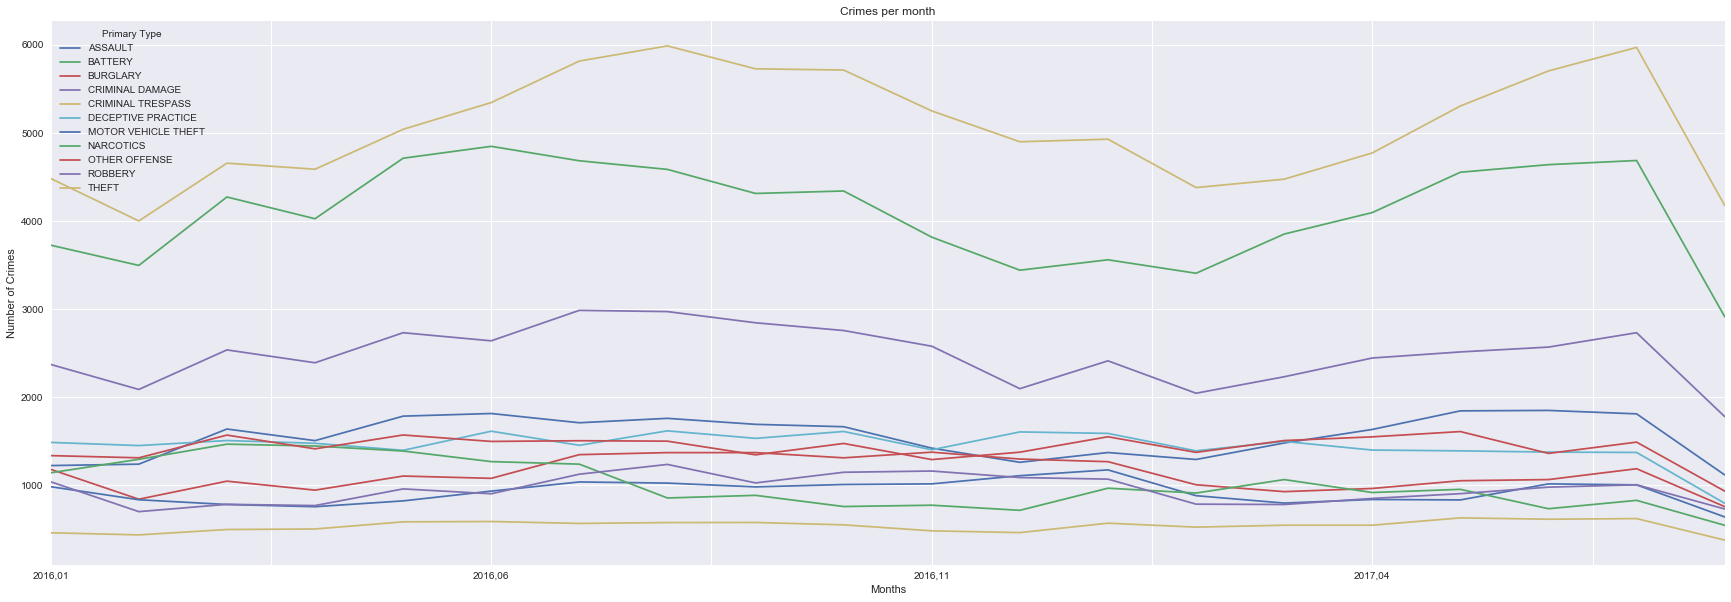

In [18]:
#PLOTTING THE TIMESERIES
fig, ax = plt.subplots(figsize=(30, 10))
mpl.style.use('seaborn')
final.plot(ax=ax);
plt.title("Crimes per month")
plt.xlabel("Months")
plt.ylabel("Number of Crimes");
#ax.set_xticks(df['Date'])
#ax.set_yticks(t0)
plt.show()

In [19]:
#MISSING DATA AND ASCENDING Date SORT
df = df.sort_values(by='Date', ascending=True)
df1 = df['Latitude'].fillna(method='ffill')
df2 = df['Longitude'].fillna(method='ffill')
df1 = df1.tolist()
df2 = df2.tolist()

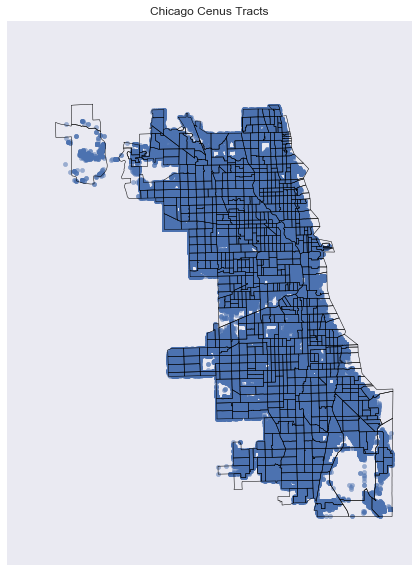

In [20]:
#USE OF LOCATION INFORMATION AND PLOTTING ON THE MAP
#import geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e
fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')
#lons = [-87.6,-87.7]
#lats = [41.65,41.75]

#x,y = m(lons,lats)
x,y = m(df2, df1)
plt.scatter(x,y,alpha=0.5,s=20)
plt.title("Chicago Cenus Tracts")
plt.show()

In [1]:
#Enter your solution here

### Problem 2 - Benchmarking Problem (25 Points)

Numpy has in-built universal functions that allow operations on multidimentional arrays. For this problem, you will be asked to test the performance of some of this functions.

For this, create an `NxN` matrix `A` and an array `B` of size `N`, with random entries (use `numpy.random`). Using `A` and `B` as inputs, performing the following operations: (compare and time the performance of sorting algorithms with and without numpy ufunc)

1. Sorting `B` (you can use `numpy.sort`) for `N` ranging from 1000 to 25000 (take steps of 1000)
2. Computing Determinant of `A` ( you can use `numpy.linalg.det` to compute the determinant of the matrix) for `N` ranging from 100 to 800 (take steps of 50)
3. Matrix Multiplication of `A*A` ( use `numpy.matmul`) for `N` ranging from 100 to 1500 

Plot the operation times for Numpy functions vs regular python commands for each operation.

The final output must include 3 plots comparing the performance of universal functions in Numpy with similar analogs in python for each operation. Provide a breif interpretation from the plots. (Feel free to test around the range of `N` for this problem).

Time taken for sorting(UFunc) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005009174346923828, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005021095275878906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
************************************************************************
Time taken for sorting [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\Users\jadha\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


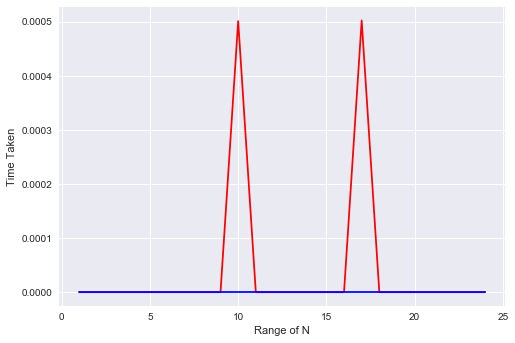

************************************************************************
************************************************************************
Time taken for calculating determinant(UFunc) [0.0, 0.0, 0.0, 0.0, 0.0]
************************************************************************
Time taken for calculating determinant [0.0, 0.0, 0.004005908966064453, 0.0642862319946289, 4.522906064987183]


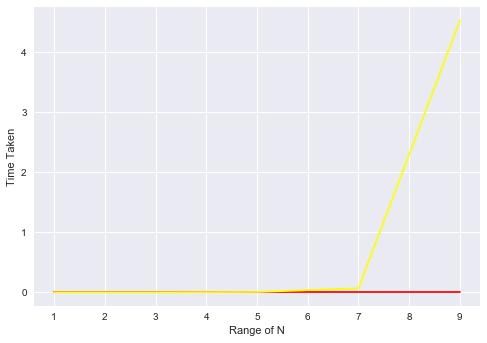

************************************************************************
************************************************************************
Time taken for matrix multiplication(UFunc) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
************************************************************************
Time taken for matrix multiplication [0.0, 0.0, 0.0, 0.0005009174346923828, 0.0005016326904296875, 0.0005009174346923828, 0.0010023117065429688, 0.0010044574737548828]


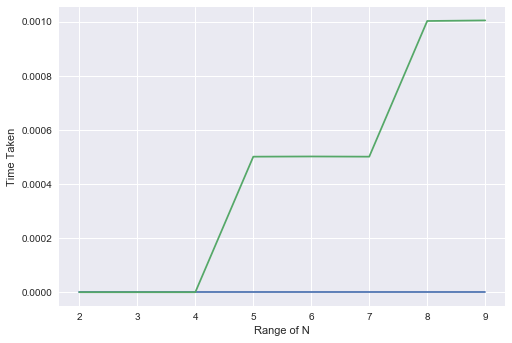

************************************************************************
************************************************************************


In [30]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

#kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
# Using Numpy functions
# 1 Sorting w/o ufunc
# check what algo sorted use and use same for np.sort
def sorting(L):
    output = np.sort(np.random.random((L)), kind='mergesort')
    return output

def sort(L):
    output = sorted(np.random.random((L)), key=int)
    return output

# 2 Computing Determinant of A
# 
def find_det(M):
    output = np.linalg.det(np.random.random((M, M)))
    return output

def detByCode(A):
    new = 0;    
    if A.shape == (2,2):
        d =  np.array(A[0][0]*A[1][1] - A[0][1]*A[1][0])
        return d
    
    if A.shape > (2,2):
        for i in range (0,A.shape[0]):
            temp = A;
            temp=np.delete(temp,0,axis = 0)
            temp=np.delete(temp,i,axis = 1)
            multiplier = A[0][i]
            if i%2 == 0:
                new = new + multiplier * detByCode(temp)
            else:
                new = new - multiplier * detByCode(temp)     
    return new;
    
# 3 Computing Matrix Multiplication of a
#for non ufunc produce own code using 3 loops
def matrix_multiply(N):
    output = np.matmul(np.random.random((N, N)), np.random.random((N, N)))
    return output

def multiplication(A):
    result = np.zeros(shape=(N,N))
    for i in range(A.shape[0]):
        
        for j in range(len(A[0])):
           
           for k in range(A.shape[1]):
                result[i][j] += A[i][k] * A[k][j]
    #plt.hist(m2-m1, **kwargs)
    #plt.show()
    
sort1 = []    
for N in range(100, 2500, 100):
    t = time.time()
    sorting(N)
    s = time.time()
    sort1.append(s-t)
print("Time taken for sorting(UFunc)", sort1)
print("************************************************************************")
sort2 = []
for N in range(10, 250, 10):
    t = time.time()
    sort(N)
    s = time.time()
    sort2.append(s-t)
print("Time taken for sorting", sort2)
mpl.style.use('seaborn')
plt.gca().set_color_cycle(['red', 'blue'])
x = list(range(1,25))
plt.plot(x, sort1)
plt.plot(x, sort2)
plt.xlabel("Range of N")
plt.ylabel("Time Taken")
plt.show()
print("************************************************************************")
print("************************************************************************")

det1 = []
for N in range(1, 10, 2):
    t = time.time()
    find_det(N)
    s = time.time() 
    det1.append(s-t)
print("Time taken for calculating determinant(UFunc)", det1)
print("************************************************************************")
det2 = []

for N in range(1, 10, 2):
    A = np.arange(N*N).reshape(N,N)
    t = time.time()
    detByCode(A)
    s = time.time()
    det2.append(s-t)
    
print("Time taken for calculating determinant", det2)
mpl.style.use('seaborn')
plt.gca().set_color_cycle(['red', 'yellow'])
x = list(range(1,10,2))
plt.plot(x, det1)
plt.plot(x, det2)
plt.xlabel("Range of N")
plt.ylabel("Time Taken")
plt.show()
print("************************************************************************")
print("************************************************************************")
mul1 = []
for N in range(2, 10):
    t = time.time()
    matrix_multiply(N)
    s = time.time() 
    mul1.append(s-t)
print("Time taken for matrix multiplication(UFunc)", mul1)
print("************************************************************************")
mul2 = []
l = []
for N in range(2, 10):
    a = np.arange(N*N).reshape(N,N)
    t = time.time()
    multiplication(a)
    s = time.time() 
    mul2.append(s-t)
    l.append(N)
print("Time taken for matrix multiplication", mul2)
mpl.style.use('seaborn')
x = list(range(2,10))
plt.plot(x, mul1)
plt.plot(x, mul2)
plt.xlabel("Range of N")
plt.ylabel("Time Taken")
plt.show()
print("************************************************************************")
print("************************************************************************")


In [23]:
#brief interpretation from the plots. 
# For sorting
# The np.sort() function takes almost no time to compute the sort i.e very quick to sort the array
# While normal python function shows some variation in time atleast not negligible.
# The UFunc is better performance wise

# For Calculating Determinant
# The np.linalg.det() is very quick . Therefore zero time difference. The time to compute the determinant is infinitely small
# The time taken for computing the determinant using coded steps is longer and is rising exponential as the matrix size grows.
# The UFunc perform very well 

# For calculating Multiplication
# The numpy.mul() is very quick again and takes very less time
# While the actual code takes great amount of time(in minutes sometimes) to generate the answer. 
# Using the numpy functions gives performance boost to the program 